In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [4]:
demographics = pd.read_excel('../data/DemoData.xlsx')
demographics['tract'] = demographics.ID.astype(str).str.zfill(9)

In [5]:
shp = gp.GeoDataFrame.from_file('../data/merged.json')

shp = shp.merge(demographics, on='tract')

shp.rename(columns={
    'Destination?': 'is_dest',
    'Origin?': 'is_orig',
    'Total Population': 'pop',
    '18 to 24 yrs': '_18_to_24',
    '65 and Above': 'above_65',
    'Median Age': 'age',
    'Non-white': 'nonwhite',
    'English less than "very well"': 'nonenglish',
    'Annaul Individual Income below 10000': 'income_below_10000',
    'Annaul Individual Income below 15000': 'income_below_15000',
    'Median Income': 'income',
    'Below 100 percent of the poverty level': 'below_pov',
    '100 to 149 percent of the poverty level': '_100_149_pov',
    'At or above 150 percent of the poverty level': 'above_150_pov',
    'Citizenship status': 'noncitizen',
    'Place of Birth': 'foreignborn'
}, inplace=True)

In [6]:
lehd = pd.read_csv('../data/merged.csv', dtype={'tract': str})

lehd = lehd.drop([u'Unnamed: 0', u'Both', u'Destination?', u'DollarVanLine', u'Origin?',
       u'average_commute_time', u'average_walk_distance', u'geometry',
       u'number_of_commuters',  u'w_county_tract', u'h_county_tract'], 1)

shp = shp.merge(lehd, on='tract')

In [7]:
shp.columns

Index([                 u'Both',               u'is_dest',
               u'DollarVanLine',               u'is_orig',
        u'average_commute_time', u'average_walk_distance',
                    u'geometry',   u'number_of_commuters',
                       u'tract',                    u'ID',
                   u'Geography',                   u'pop',
                   u'_18_to_24',              u'above_65',
                         u'age',              u'nonwhite',
                  u'nonenglish',    u'income_below_10000',
          u'income_below_15000',                u'income',
                   u'below_pov',          u'_100_149_pov',
               u'above_150_pov',            u'noncitizen',
                 u'foreignborn',        u'wac_total_jobs',
              u'wac_jobs_lt_29',        u'wac_jobs_30_54',
              u'wac_jobs_gt_55',      u'wac_minc_lt_1250',
          u'wac_minc_1251_3333',      u'wac_minc_gt_3333',
              u'rac_total_jobs',        u'rac_jobs_lt_29

In [8]:
# Standardize Value Range
for c in [
        u'average_commute_time', u'average_walk_distance',
        u'number_of_commuters',u'pop',
                       u'_18_to_24',                    u'above_65',
                         u'age',             u'nonwhite',
                  u'nonenglish',    u'income_below_10000',
          u'income_below_15000',                u'income',
                   u'below_pov',           u'_100_149_pov',
               u'above_150_pov',            u'noncitizen',
                 u'foreignborn',
    u'wac_total_jobs',
              u'wac_jobs_lt_29',        u'wac_jobs_30_54',
              u'wac_jobs_gt_55',      u'wac_minc_lt_1250',
          u'wac_minc_1251_3333',      u'wac_minc_gt_3333',
              u'rac_total_jobs',        u'rac_jobs_lt_29',
              u'rac_jobs_30_54',        u'rac_jobs_gt_55',
            u'rac_minc_lt_1250',    u'rac_minc_1251_3333',
            u'rac_minc_gt_3333'
]:
    shp[c] = ((shp[c] - shp[c].mean())/shp[c].std())

In [9]:
shp = shp.dropna()

In [353]:
shp.corr()

,Both,is_dest,DollarVanLine,is_orig,average_commute_time,average_walk_distance,number_of_commuters,ID,pop,_18_to_24,...,wac_minc_lt_1250,wac_minc_1251_3333,wac_minc_gt_3333,rac_total_jobs,rac_jobs_lt_29,rac_jobs_30_54,rac_jobs_gt_55,rac_minc_lt_1250,rac_minc_1251_3333,rac_minc_gt_3333
Both,1.000000,0.870064,0.536387,0.536387,-0.042388,-0.059321,0.006294,-0.018230,0.002497,0.007832,...,0.029476,0.022695,0.009635,0.002406,-0.006698,-0.002691,0.027379,0.068748,0.068998,-0.049154
is_dest,0.870064,1.000000,0.440213,0.440213,-0.118195,-0.115236,0.067916,-0.016859,0.018550,0.010843,...,0.174016,0.153291,0.141350,0.053355,0.048468,0.054906,0.044520,0.097750,0.079332,0.012666
DollarVanLine,0.536387,0.440213,1.000000,1.000000,0.156633,0.095104,-0.082391,0.109300,-0.070982,0.000553,...,-0.055084,-0.047912,-0.047487,-0.107127,-0.117056,-0.116991,-0.045996,-0.038651,0.010171,-0.151245
is_orig,0.536387,0.440213,1.000000,1.000000,0.156633,0.095104,-0.082391,0.109300,-0.070982,0.000553,...,-0.055084,-0.047912,-0.047487,-0.107127,-0.117056,-0.116991,-0.045996,-0.038651,0.010171,-0.151245
average_commute_time,-0.042388,-0.118195,0.156633,0.156633,1.000000,0.909499,-0.631339,0.063445,-0.550234,-0.035080,...,-0.315786,-0.264563,-0.227197,-0.657937,-0.650903,-0.659185,-0.530964,-0.582172,-0.442628,-0.595150
average_walk_distance,-0.059321,-0.115236,0.095104,0.095104,0.909499,1.000000,-0.581598,0.110842,-0.511831,-0.035859,...,-0.274470,-0.227796,-0.196284,-0.602256,-0.587329,-0.598880,-0.509117,-0.540254,-0.426413,-0.533105
number_of_commuters,0.006294,0.067916,-0.082391,-0.082391,-0.631339,-0.581598,1.000000,0.035603,0.622728,-0.041139,...,0.310034,0.246455,0.203206,0.801338,0.798489,0.778450,0.706435,0.556084,0.368373,0.849704
ID,-0.018230,-0.016859,0.109300,0.109300,0.063445,0.110842,0.035603,1.000000,-0.030777,-0.135903,...,0.044525,0.031916,0.026970,-0.010575,-0.093749,-0.007963,0.089209,-0.128349,-0.186576,0.107858
pop,0.002497,0.018550,-0.070982,-0.070982,-0.550234,-0.511831,0.622728,-0.030777,1.000000,0.005344,...,0.062664,0.037489,-0.016751,0.896508,0.825102,0.885422,0.836479,0.870738,0.841937,0.681398
_18_to_24,0.007832,0.010843,0.000553,0.000553,-0.035080,-0.035859,-0.041139,-0.135903,0.005344,1.000000,...,0.094939,0.068644,0.039663,-0.062330,0.056408,-0.084620,-0.138276,0.039119,0.083159,-0.141969


In [354]:
mod = smf.ols(formula='is_orig ~ average_commute_time + nonwhite + noncitizen + above_65 + below_pov', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                is_orig   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     92.24
Date:                Tue, 08 Mar 2016   Prob (F-statistic):           5.31e-88
Time:                        15:29:36   Log-Likelihood:                -895.48
No. Observations:                2115   AIC:                             1803.
Df Residuals:                    2109   BIC:                             1837.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.2110 

In [347]:
mod = smf.ols(formula='is_dest ~ average_commute_time + nonwhite + income + pop + wac_total_jobs', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                is_dest   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     27.33
Date:                Tue, 08 Mar 2016   Prob (F-statistic):           7.08e-27
Time:                        15:26:08   Log-Likelihood:                -310.96
No. Observations:                2117   AIC:                             633.9
Df Residuals:                    2111   BIC:                             667.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0921 

In [351]:
mod = smf.ols(formula='Both ~ average_commute_time + nonwhite + pop + nonenglish + foreignborn + noncitizen + rac_total_jobs', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                   Both   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     15.71
Date:                Tue, 08 Mar 2016   Prob (F-statistic):           3.28e-20
Time:                        15:26:47   Log-Likelihood:                -76.817
No. Observations:                2117   AIC:                             169.6
Df Residuals:                    2109   BIC:                             214.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0713 

In [10]:
data = shp[[
    'average_commute_time', 
    'average_walk_distance',
    'number_of_commuters',
    'pop',
    '_18_to_24',
    'above_65',
    'age',
    'nonwhite',
    'nonenglish',
    'income_below_10000',
    'income_below_15000',
    'income',
    'below_pov',
    '_100_149_pov',
    'above_150_pov',
    'noncitizen',
    'foreignborn',
    'wac_total_jobs',
    'wac_jobs_lt_29',        
    'wac_jobs_30_54',
    'wac_jobs_gt_55', 
    'wac_minc_lt_1250',
    'wac_minc_1251_3333',      
    'wac_minc_gt_3333',
    'rac_total_jobs',
    'rac_jobs_lt_29',
    'rac_jobs_30_54',  
    'rac_jobs_gt_55',
    'rac_minc_lt_1250',    
    'rac_minc_1251_3333',
    'rac_minc_gt_3333'
]].values

is_orig = shp['is_orig'].values
is_dest = shp['is_dest'].values
is_both = shp['Both'].values

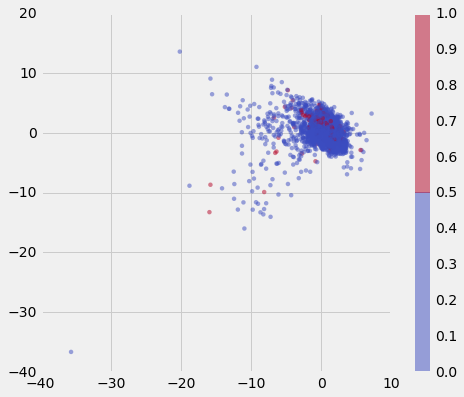

In [364]:
pca = PCA()
#X = shp.dropna()[['average_commute_time', 'above_65', 'nonwhite', 'nonenglish', 'below_pov', 'noncitizen', 'foreignborn']].values
Xproj = pca.fit_transform(data)
figure, ax = plt.subplots(figsize=(7,6))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=is_both, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('coolwarm', 2))
figure.colorbar(s, ax=ax)

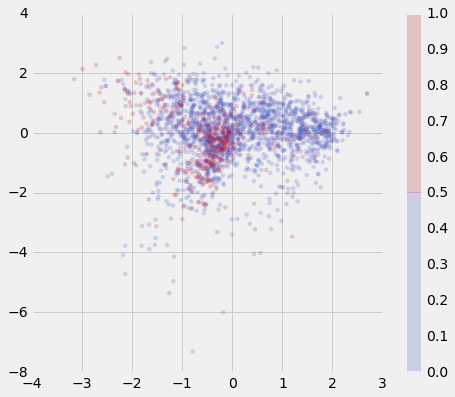

In [359]:
pca = PCA()
X = shp.dropna()[['nonwhite', 'nonenglish', 'foreignborn']].values
Xproj = pca.fit_transform(X)
figure, ax = plt.subplots(figsize=(7,6))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=shp['is_orig'], edgecolor='none', alpha=0.2, cmap=plt.cm.get_cmap('coolwarm', 2))
figure.colorbar(s, ax=ax)

In [149]:
pca.components_

array([[ 0.14144964, -0.25295468,  0.39833753,  0.36777277,  0.44940081,
         0.48258799,  0.43269397],
       [-0.11104776, -0.37032631,  0.3531932 ,  0.1363024 ,  0.43721237,
        -0.51593286, -0.49986165],
       [ 0.81783892,  0.16476315,  0.45226663, -0.19686016, -0.19615579,
        -0.08291518, -0.12386106],
       [ 0.21584483,  0.41181923, -0.26833579,  0.77079684,  0.04748247,
         0.04445866, -0.33682772],
       [-0.2142053 ,  0.76185066,  0.23808244, -0.2091787 ,  0.46682756,
        -0.16234119,  0.1702294 ],
       [-0.45401623,  0.14393185,  0.61477319,  0.20282274, -0.52618805,
         0.20482679, -0.1877282 ],
       [ 0.01400933, -0.03158433,  0.07350684,  0.35831601, -0.2671156 ,
        -0.65097   ,  0.60819393]])

[[  0.           0.           0.           0.         -26.           0.
    0.        ]
 [  0.           0.           0.           0.           0.          21.64093831
   21.56700277]]


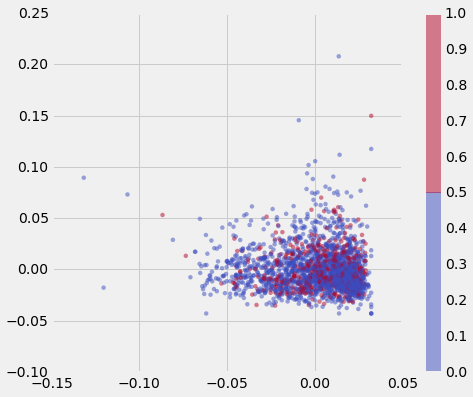

In [155]:
spca = SparsePCA(n_components=2,alpha=20,verbose=False,method='lars')
Xproj = spca.fit_transform(X)
figure, ax = plt.subplots(figsize=(7,6))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=shp.dropna()['is_orig'], edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('coolwarm', 2))
figure.colorbar(s, ax=ax)
print spca.components_

In [48]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets.classification import ClassificationDataSet
from pybrain.structure import TanhLayer, SoftmaxLayer
from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(data.shape[1], 5, 1, hiddenclass=TanhLayer)
ds = ClassificationDataSet(data.shape[1])

#data = shp.dropna()[['average_commute_time', 'above_65', 'nonwhite', 'nonenglish', 'below_pov', 'noncitizen', 'foreignborn', 'is_orig']].values
#for row in data:
#    ds.addSample(row[:7], row[-1])
for i in range(data.shape[0]):
    ds.addSample(data[i], is_orig[i])
    
trainer = BackpropTrainer(net, ds)
#trainer.trainUntilConvergence()

In [49]:
i = 0
while True:
    i += 100
    trainer.trainEpochs(100)
    
    pred = []
    for row in data:
        pred.append(1 if net.activate(row) > .1 else 0)

    pred = np.array(pred)

    target = is_orig
    
    print "epochs", i
    print "% origin misclassified =", 1.*(target[target == 1] != pred[target == 1]).sum()/target[target == 1].shape[0]
    print "% nonorigin misclassified =", 1.*(target[target == 0] != pred[target == 0]).sum()/target[target == 0].shape[0]

epochs 2214
% origin misclassified = 0.0941704035874
% nonorigin misclassified = 0.569203115638
epochs 2314
% origin misclassified = 0.0493273542601
% nonorigin misclassified = 0.621330137807
epochs 2414
% origin misclassified = 0.0986547085202
% nonorigin misclassified = 0.422408627921
epochs 2514
% origin misclassified = 0.042600896861
% nonorigin misclassified = 0.603954463751
epochs 2614
% origin misclassified = 0.0627802690583
% nonorigin misclassified = 0.487717195926
epochs 2714
% origin misclassified = 0.0605381165919
% nonorigin misclassified = 0.496105452367
epochs 2814
% origin misclassified = 0.0538116591928
% nonorigin misclassified = 0.450569203116
epochs 2914
% origin misclassified = 0.0605381165919
% nonorigin misclassified = 0.423007789095
epochs 3014
% origin misclassified = 0.0627802690583
% nonorigin misclassified = 0.453565008987
epochs 3114
% origin misclassified = 0.0224215246637
% nonorigin misclassified = 0.620131815458
epochs 3214
% origin misclassified = 0.06

KeyboardInterrupt: 

In [52]:
pred = []
for row in data:
    pred.append(1 if net.activate(row) > .15 else 0)

pred = np.array(pred)

target = is_orig

print "epochs", i
print "% origin misclassified =", 1.*(target[target == 1] != pred[target == 1]).sum()/target[target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(target[target == 0] != pred[target == 0]).sum()/target[target == 0].shape[0]

epochs 3614
% origin misclassified = 0.134529147982
% nonorigin misclassified = 0.227681246255


In [217]:
net = buildNetwork(17, 20, 1, hiddenclass=TanhLayer)
ds = ClassificationDataSet(17)

data = shp.dropna()[[
    'average_commute_time', 
    'average_walk_distance',
    'number_of_commuters',
    'pop',
    '_18_to_24',
    'above_65',
    'age',
    'nonwhite',
    'nonenglish',
    'income_below_10000',
    'income_below_15000',
    'income',
    'below_pov',
    '_100_149_pov',
    'above_150_pov',
    'noncitizen',
    'foreignborn',
    'is_orig'
]].values

for row in data:
    ds.addSample(row[:-1], row[-1])

In [ ]:
trainer = BackpropTrainer(net, ds)
trainer.trainUntilConvergence()
""

In [13]:
pred = []
for row in data:
    pred.append(1 if net.activate(row[:-1]) > .1 else 0)
    
pred = np.array(pred)

target = is_orig

print "% origin misclassified =", 1.*(target[target == 1] != pred[target == 1]).sum()/target[target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(target[target == 0] != pred[target == 0]).sum()/target[target == 0].shape[0]

AssertionError: (31, 30)

In [253]:
from pybrain.structure.modules import SoftmaxLayer

net = buildNetwork(17, 10, 2, hiddenclass=SoftmaxLayer)
ds = ClassificationDataSet(17)

data = shp.dropna()[[
    'average_commute_time', 
    'average_walk_distance',
    'number_of_commuters',
    'pop',
    '_18_to_24',
    'above_65',
    'age',
    'nonwhite',
    'nonenglish',
    'income_below_10000',
    'income_below_15000',
    'income',
    'below_pov',
    '_100_149_pov',
    'above_150_pov',
    'noncitizen',
    'foreignborn',
    'is_orig'
]].values

for row in data:
    ds.addSample(row[:-1], row[-1])

ds._convertToOneOfMany()

In [254]:
trainer = BackpropTrainer(net, ds)

In [255]:
trainer.trainUntilConvergence()
""

''

In [256]:
from pybrain.utilities import percentError
percentError(trainer.testOnClassData(), ds['class'])

18.61124232404346

In [18]:
data = shp.dropna()[[
    'average_commute_time', 
    'average_walk_distance',
    'number_of_commuters',
    'pop',
    '_18_to_24',
    'above_65',
    'age',
    'nonwhite',
    'nonenglish',
    'income_below_10000',
    'income_below_15000',
    'income',
    'below_pov',
    '_100_149_pov',
    'above_150_pov',
    'noncitizen',
    'foreignborn'
]].values

target = shp.dropna()['is_orig'].values

In [236]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(data, target)

GaussianNB()

In [237]:
pred = gnb.predict(data)

In [23]:
print data.shape[0], (target != pred).sum()

 2117 691


In [238]:
print "% origin misclassified =", 1.*(target[target == 1] != pred[target == 1]).sum()/target[target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(target[target == 0] != pred[target == 0]).sum()/target[target == 0].shape[0]

% origin misclassified = 0.237136465324
% nonorigin misclassified = 0.350299401198


In [243]:
from sklearn.cross_validation import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=.33)

In [226]:
from sklearn import svm
svc = svm.SVC(
    C=1, kernel='poly', degree=7, gamma='auto', coef0=.4, shrinking=False, 
    probability=False, tol=0.0001, cache_size=200, class_weight={1: 6}, verbose=False, 
    max_iter=-1, decision_function_shape=None
)
svc.fit(train_data, train_target)

pred = svc.predict(test_data)

print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.235294117647
% nonorigin misclassified = 0.260073260073


In [142]:
test_target[test_target == 1] != pred[test_target == 1]

array([ True, False,  True, False,  True,  True, False,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True,

In [40]:
print "% origin misclassified =", 1.*(target[target == 1] != pred[target == 1]).sum()/target[target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(target[target == 0] != pred[target == 0]).sum()/target[target == 0].shape[0]

% origin misclassified = 0.541387024609
% nonorigin misclassified = 0.0311377245509


In [227]:
train_data = data
test_data = data
train_target = target
test_target = target

svc = svm.SVC(
    C=1, kernel='poly', degree=7, gamma='auto', coef0=.4, shrinking=False, 
    probability=False, tol=0.0001, cache_size=200, class_weight={1: 6}, verbose=False, 
    max_iter=-1, decision_function_shape=None
)
svc.fit(train_data, train_target)

pred = svc.predict(test_data)

print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.0111856823266
% nonorigin misclassified = 0.160479041916


In [229]:
shp = shp.dropna()

In [53]:
shp['pred'] = pred

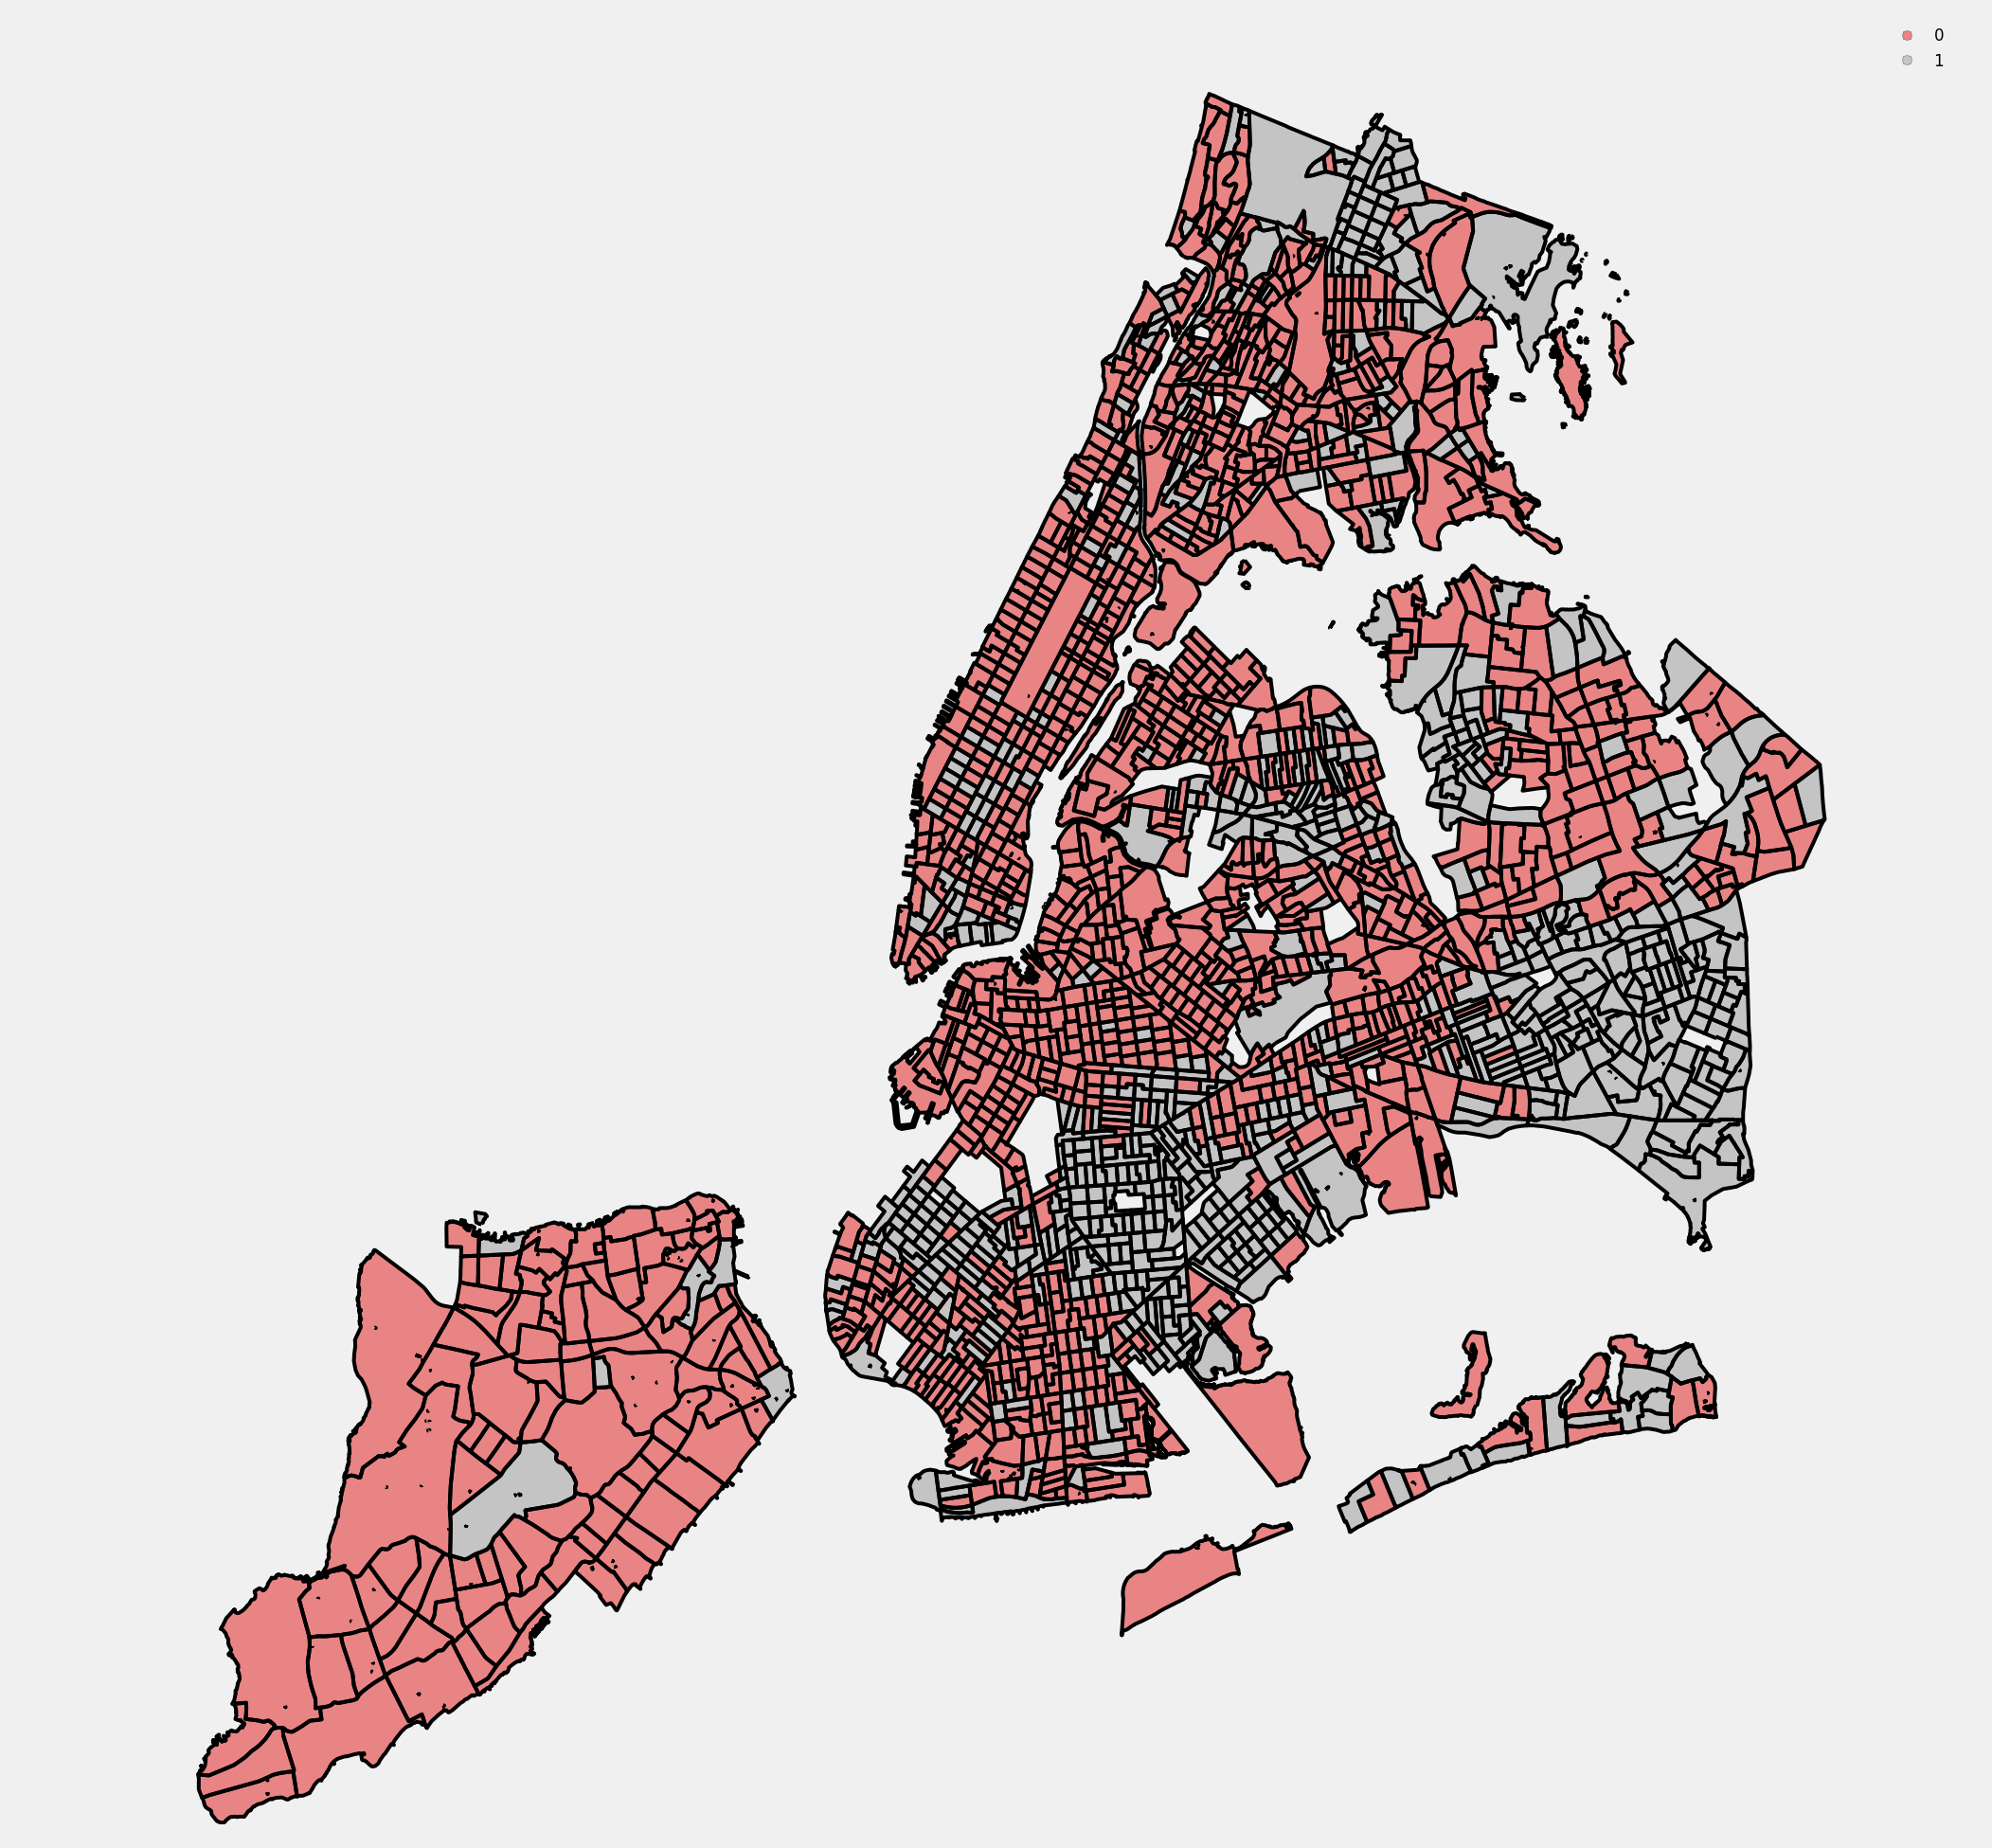

In [54]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(axes=ax, column='pred', legend=True, categorical=True)

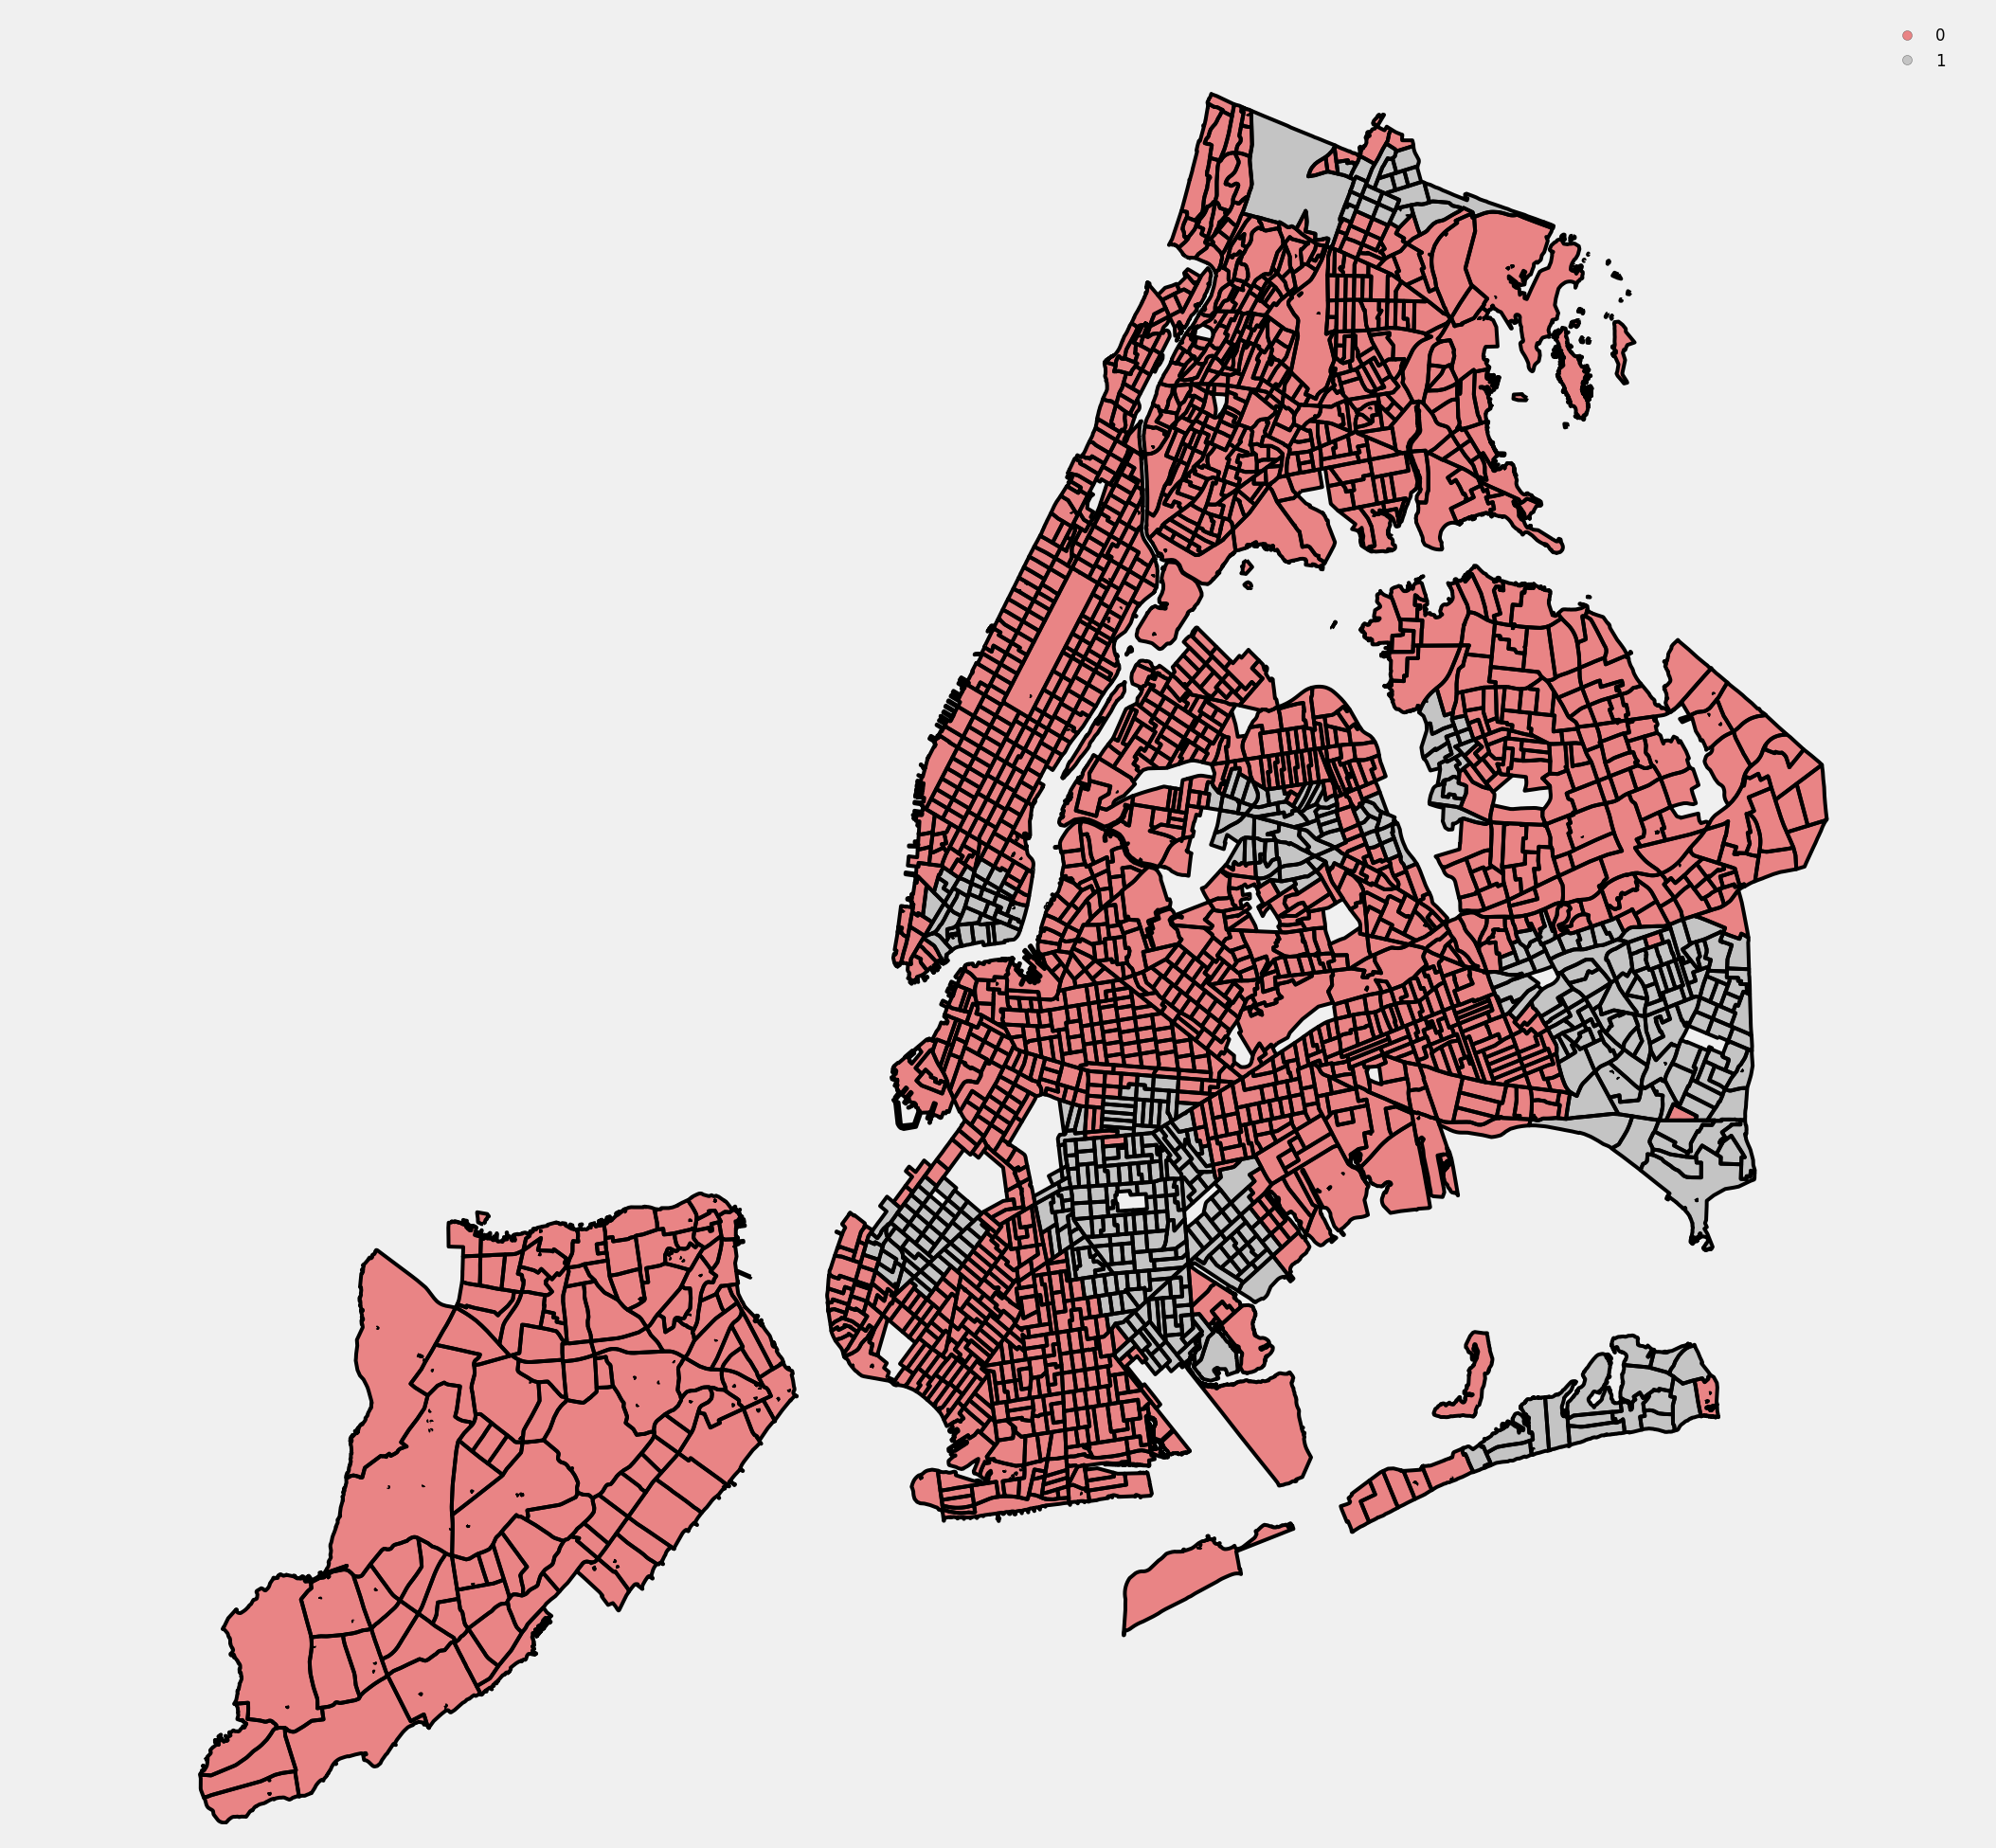

In [235]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(axes=ax, column='is_orig', legend=True, categorical=True)

In [276]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, class_weight={1: .2}, criterion='entropy')
rf.fit(train_data, train_target)
pred = rf.predict(test_data)
print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.527397260274
% nonorigin misclassified = 0.0705244122966


In [295]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(2, weights='distance', p=2)
kn.fit(train_data, train_target)

pred = kn.predict(test_data)
print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.397260273973
% nonorigin misclassified = 0.141048824593


In [319]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets.classification import ClassificationDataSet
from pybrain.structure import TanhLayer
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer
from pybrain.utilities import percentError

net = buildNetwork(17, 10, 2, hiddenclass=TanhLayer)
ds = ClassificationDataSet(17)

for i in range(len(data)):
    ds.addSample(data[i], target[i])

ds._convertToOneOfMany()

trainer = BackpropTrainer(net, ds)

In [323]:
trainer.trainEpochs(500)
#trainer.trainUntilConvergence()
percentError(trainer.testOnClassData(), ds['class'])
pred = np.array(trainer.testOnClassData())
print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.91095890411
% nonorigin misclassified = 0.0940325497288


c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1587 but corresponding boolean dimension is 699
c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1587 but corresponding boolean dimension is 699


In [321]:
percentError(trainer.testOnClassData(), ds['class'])
pred = np.array(trainer.testOnClassData())
print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.86301369863
% nonorigin misclassified = 0.113924050633


c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1587 but corresponding boolean dimension is 699
  app.launch_new_instance()
c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1587 but corresponding boolean dimension is 699


In [310]:
pred = np.array(trainer.testOnClassData())
print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 1.0
% nonorigin misclassified = 0.0


c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2117 but corresponding boolean dimension is 699
  from ipykernel import kernelapp as app
c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2117 but corresponding boolean dimension is 699
  app.launch_new_instance()


In [313]:
i = 0
while True:
    trainer.trainEpochs(10)
    pred = np.array(trainer.testOnClassData())
    print i
    print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
    print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]
    i += 10

0
% origin misclassified = 0.938356164384
% nonorigin misclassified = 0.0524412296564
10
% origin misclassified = 0.897260273973
% nonorigin misclassified = 0.0867992766727
20
% origin misclassified = 1.0
% nonorigin misclassified = 0.0
30
% origin misclassified = 0.931506849315
% nonorigin misclassified = 0.0343580470163


c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2117 but corresponding boolean dimension is 699
c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2117 but corresponding boolean dimension is 699


KeyboardInterrupt: 

In [311]:
percentError(trainer.testOnClassData(), ds['class'])

21.114785073216815

In [318]:
net.activate(data[0])

array([ 0.88948949,  0.11303629])